# LAB4

#### Функция чтения аннотации

In [81]:
import csv
import typing
import pandas as pd
import cv2 
import random
import matplotlib.pyplot as plt

In [82]:
def read_file(path: str) -> list[list[str]]:
    '''Читает файл path и возвращает матрицу имён файлов'''
    files: list[list[str]] = []
    csvfile: typing.TextIO = open(path, "r")
    reader: csv.DictReader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        files.append([row["full_path"], row["class"]])
    return files

list_file_info: list[list[str]] = read_file("annotation.csv")

#### (1) Создание датафрейма с двумя колонками

In [83]:
def create_df_with_two_columns(list_files_info):
    df = pd.DataFrame(columns=["Name", "AbsPath"])
    for file_info in list_files_info:
        df.loc[len(df)] = [file_info[1], file_info[0]]
    return df

create_df_with_two_columns(list_file_info)

,Name,AbsPath
0,cat,C:\Users\Professional\Desktop\lab python\datas...
1,cat,C:\Users\Professional\Desktop\lab python\datas...
2,cat,C:\Users\Professional\Desktop\lab python\datas...
3,cat,C:\Users\Professional\Desktop\lab python\datas...
4,cat,C:\Users\Professional\Desktop\lab python\datas...
...,...,...
1995,dog,C:\Users\Professional\Desktop\lab python\datas...
1996,dog,C:\Users\Professional\Desktop\lab python\datas...
1997,dog,C:\Users\Professional\Desktop\lab python\datas...
1998,dog,C:\Users\Professional\Desktop\lab python\datas...


#### (2,3,4) Именование колонок, метка, форма

In [84]:
def create_df(list_files_info):
    df = pd.DataFrame(columns=["Name", "AbsPath", "ClassId", "Weight", "Height", "Depth"])
    for file_info in list_file_info:
        class_id = (0 if "cat" == file_info[1] else 1)
        im = cv2.imread(file_info[0])
        h,w,c = im.shape
        df.loc[len(df)] = [file_info[1], file_info[0], class_id, w,h,c]
    return df

df = create_df(list_file_info)
df

,Name,AbsPath,ClassId,Weight,Height,Depth
0,cat,C:\Users\Professional\Desktop\lab python\datas...,0,427,320,3
1,cat,C:\Users\Professional\Desktop\lab python\datas...,0,444,320,3
2,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,320,3
3,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,300,3
4,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,300,3
...,...,...,...,...,...,...
1995,dog,C:\Users\Professional\Desktop\lab python\datas...,1,466,320,3
1996,dog,C:\Users\Professional\Desktop\lab python\datas...,1,455,320,3
1997,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3
1998,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3


#### (5) Статистическая информация

In [85]:
def get_static_info(df):
    """
    
    """
    return {"Height": df["Height"].mean(), "Weight": df["Weight"].mean(),
            "Depht":  df["Depth"].mean(), "ClassId": df["ClassId"].mean()}

get_static_info(df)

{'Height': 309.43, 'Weight': 443.832, 'Depht': 3.0, 'ClassId': 0.5}

#### (6) Фильтрация по классу

In [86]:
def df_filter_by_class_id(df, class_id) -> pd.DataFrame:
    return df.loc[ df["ClassId"] == class_id ]

df_filter_by_class_id(df, 1)

,Name,AbsPath,ClassId,Weight,Height,Depth
1000,dog,C:\Users\Professional\Desktop\lab python\datas...,1,427,320,3
1001,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3
1002,dog,C:\Users\Professional\Desktop\lab python\datas...,1,427,320,3
1003,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,270,3
1004,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,300,3
...,...,...,...,...,...,...
1995,dog,C:\Users\Professional\Desktop\lab python\datas...,1,466,320,3
1996,dog,C:\Users\Professional\Desktop\lab python\datas...,1,455,320,3
1997,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3
1998,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3


#### (7) Фильтрация по размеру и классу

In [87]:
def df_filter_by_size_and_class_id(df, weight, height, class_id):
     return df.loc[ (df["ClassId"] == class_id) & (df["Weight"] <= weight) & (df["Height"] <= height) ]

df_filter_by_size_and_class_id(df, 320, 320, 1)

,Name,AbsPath,ClassId,Weight,Height,Depth
1036,dog,C:\Users\Professional\Desktop\lab python\datas...,1,320,320,3
1042,dog,C:\Users\Professional\Desktop\lab python\datas...,1,240,320,3
1096,dog,C:\Users\Professional\Desktop\lab python\datas...,1,305,320,3
1152,dog,C:\Users\Professional\Desktop\lab python\datas...,1,320,320,3
1196,dog,C:\Users\Professional\Desktop\lab python\datas...,1,256,320,3
...,...,...,...,...,...,...
1952,dog,C:\Users\Professional\Desktop\lab python\datas...,1,256,320,3
1954,dog,C:\Users\Professional\Desktop\lab python\datas...,1,320,320,3
1978,dog,C:\Users\Professional\Desktop\lab python\datas...,1,244,320,3
1981,dog,C:\Users\Professional\Desktop\lab python\datas...,1,240,320,3


#### (8) Добавление поля количества пикселей

In [88]:
def df_add_pixel_column(df):
    return df.assign(PixelSize = df["Height"] * df["Weight"])

df = df_add_pixel_column(df)
df

,Name,AbsPath,ClassId,Weight,Height,Depth,PixelSize
0,cat,C:\Users\Professional\Desktop\lab python\datas...,0,427,320,3,136640
1,cat,C:\Users\Professional\Desktop\lab python\datas...,0,444,320,3,142080
2,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,320,3,153600
3,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,300,3,144000
4,cat,C:\Users\Professional\Desktop\lab python\datas...,0,480,300,3,144000
...,...,...,...,...,...,...,...
1995,dog,C:\Users\Professional\Desktop\lab python\datas...,1,466,320,3,149120
1996,dog,C:\Users\Professional\Desktop\lab python\datas...,1,455,320,3,145600
1997,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3,153600
1998,dog,C:\Users\Professional\Desktop\lab python\datas...,1,480,320,3,153600


In [89]:
def df_group_by_class_id(df):
    return df.groupby(["ClassId"])

group_df = df_group_by_class_id(df)

#### Max

In [90]:
group_df["PixelSize"].max()

ClassId
0    153600
1    153600
Name: PixelSize, dtype: int64

#### Mean

In [91]:
group_df["PixelSize"].mean()

ClassId
0    135480.64
1    138424.64
Name: PixelSize, dtype: float64

#### Min

In [92]:
group_df["PixelSize"].min()

ClassId
0    51200
1    66880
Name: PixelSize, dtype: int64

#### (9) Гистограмма

In [93]:
def get_gist_channels(df, class_id) -> typing.Sequence[cv2.typing.MatLike]:
    filter = df_filter_by_class_id(df, class_id)
    path = filter["AbsPath"][random.randint(0, len(filter)-1)]
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.split(img)

r, g, b = get_gist_channels(df, 0)

#### (10) Отрисовка гистограммы

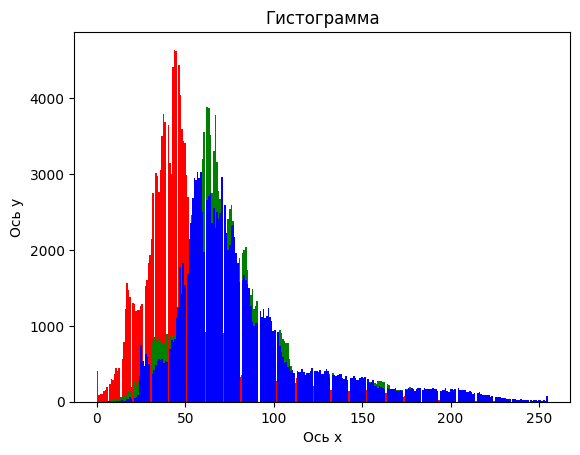

In [94]:
plt.hist(r.ravel(), bins=280, color='red')
plt.hist(g.ravel(), bins=280, color='green')
plt.hist(b.ravel(), bins=280, color='blue')

plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Гистограмма")

plt.show()